![ALT_TEXT_FOR_SCREEN_READERS](./header.png)

# Exercise 3.0 Image Processing with NumPy and Pillow

The goal of this exercise is to explore fundamental image manipulation techniques using only two lightweight Python libraries: NumPy for numerical operations and Pillow (PIL) for image input/output. This forms the basis for understanding how images are represented as arrays, manipulated at the pixel level, and prepared for tasks such as machine learning and computer vision.

You will learn how to:

- Load and display images
- Convert between color models and extract color layers
- Crop, resize, normalize, and standardize image data
- Histogram equalization per channel

These tasks are important building blocks for deeper topics such as feature extraction, data augmentation, and model input preprocessing. Each task ends with a visual output so you can verify the correctness of your implementation.

Please follow the instructions in each section and visualize the results to deepen your understanding.

## Considerations

- Implement the exercise in **python** language
- Use numpy and pillow modules of python
- You are allowed to use generative models to create your code
- You can implement the exercise in a local notebook or in a hosted colab notebook
- When you are using a local notebook, please **create a copy** of this notebook with a different name
- The code has to be included in the resulting print of the notebook

# Task 1: Load and Convert Images to NumPy Arrays

In this task, you will learn how to load an image from a file using Pillow and convert it into a NumPy array. This is the fundamental first step in any image processing pipeline. Display the image at the end to verify correct loading.



Shape: (512, 512, 4), Dtype: uint8


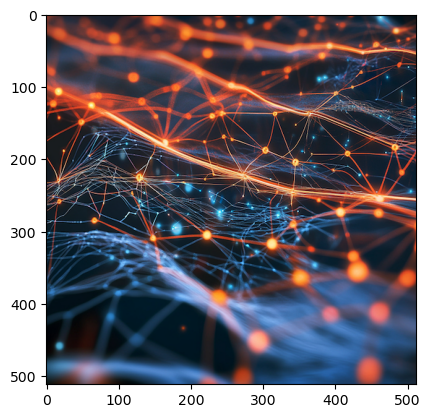

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Load image "./documents/image.png" using PIL into a variable called img
...

# Convert img to numpy array arr and display dimensions using shape function of numpy
...
print(f"Shape: {arr.shape}, Dtype: {arr.dtype}")


# Display numpy array inline in the notebook using matplotlib
plt.imshow(arr)
plt.show()

# Task 2: Extract Color Layers and Convert Color Models
In this task, you will split an image into its Red, Green, and Blue components, convert it to grayscale using two different methods, and manually approximate a conversion to CMYK color space. Display the grayscale and CMYK result images at the end.



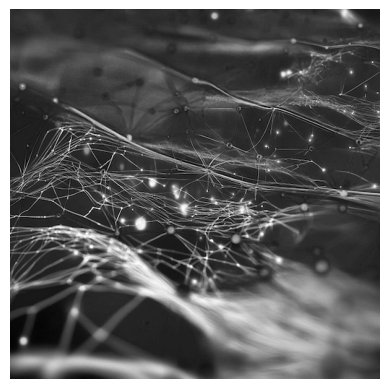

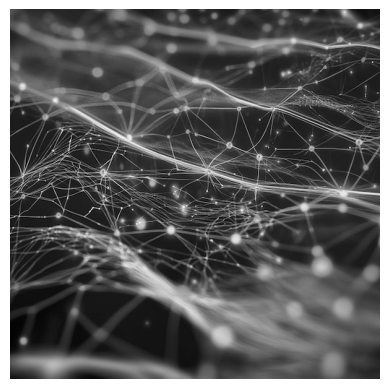

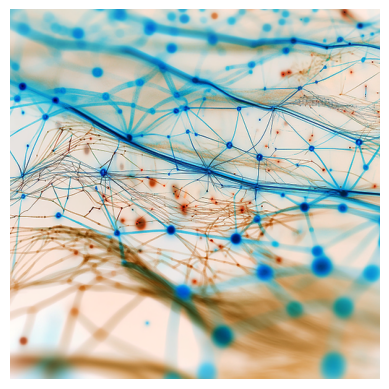

In [15]:
# Split RGB channels from the numpy array from task 1 and display blue channel, store the channels in numpy variables r,g,b
r, g, b = ...

plt.imshow(b, cmap='gray')
plt.show()




# Convert the numpy array with the color image to grayscale (simple average method or weighted method) and display
gray_avg = ...
plt.imshow(gray_avg, cmap='gray')
plt.axis('off')
plt.show()





# Convert to CMYK manually (approximation method) and display result, use the r,g,b arrays as input
c = ...
m = ...
y = ...
k = ...
cmyk = np.stack([c, m, y, k], axis=2)

plt.imshow(cmyk[:,:,0:3])  # Approximate CMY as RGB
plt.axis('off')
plt.show()


# Task 3: Image Cropping and Part Extraction

In this task, you will crop a portion of the image based on four percentage values: two define the center of the crop (as percent of width and height), and two define the size of the crop area (as percent of width and height). This flexible cropping method is useful for the extraction of image parts using coordinates given by object boxes (e.g. like with yolo). Display the cropped image.


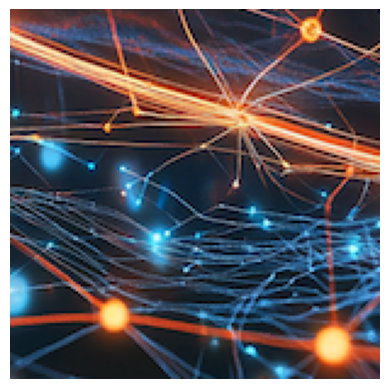

In [19]:
# Define crop parameters in percent
center_x_percent = 0.5  # 50% from the left
center_y_percent = 0.5  # 50% from the top
width_percent = 0.3     # 30% width of the image
height_percent = 0.3    # 30% height of the image



# Calculate new pixel values
width, height = img.size

...


# Crop using calculated coordinates, use either PIL image img or the numpy array as input
cropped_img = img.crop((left, upper, right, lower))



# Display final results
plt.imshow(cropped_img)
plt.axis('off')
plt.show()





# Task 4: Aspect Ratio Preserving Resize with Padding
In this task, you will resize an image to fit within a specific target size (e.g. 128×128) while preserving its original aspect ratio. To avoid distortion, black padding (letterboxing) will be added as necessary. This is a common preprocessing step for machine learning models expecting fixed input sizes.


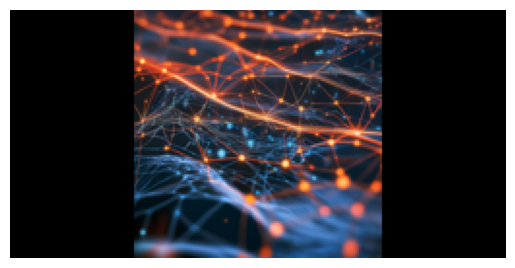

In [32]:
# Desired output size
output_size = (256, 128)


# Determine original image size and aspect ratio
original_width, original_height = img.size
original_aspect = original_width / original_height
output_aspect = output_size[0] / output_size[1]




# Determine new size preserving aspect ratio
...



# Resize image while preserving aspect ratio
resized_aspect_img = ...




# Create new black image of desired outputsize and paste resized source image into center
...


# Display final result
plt.imshow(new_img)
plt.axis('off')
plt.show()

# Task 5: Normalization, and Standardization
This task teaches how to prepare pixel values for machine learning models by normalization and standardization. Display the histograms of pixel values before and after standardization.

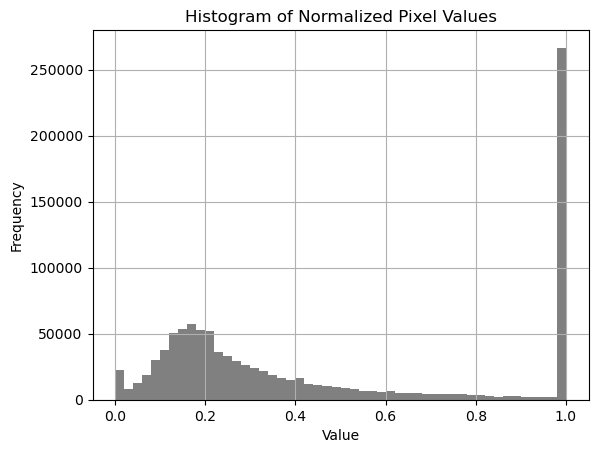

Mean: -0.0000, Std: 1.0000


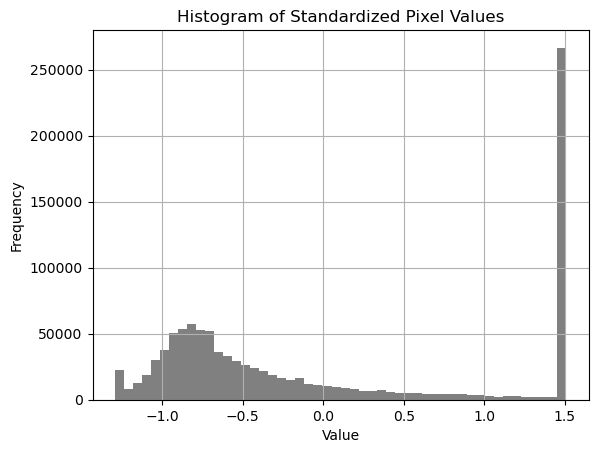

In [33]:

# Normalize pixel values to [0, 1]
resized_arr = ...



# Plot histogram of pixel values
plt.hist(resized_arr.flatten(), bins=50, color='gray')
plt.title('Histogram of Normalized Pixel Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





# Standardize (per image): mean == 0 and std deviation = 1

standardized = ...



# Print mean and standard deviation of the resulting image pixel values

print(f"Mean: {standardized.mean():.4f}, Std: {standardized.std():.4f}")




# Plot histogram of pixel values after standardization

plt.hist(standardized.flatten(), bins=50, color='gray')
plt.title('Histogram of Standardized Pixel Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Task 6: Histogram Equalization per Channel
Histogram equalization enhances image contrast. For some computer vision tasks this may be beneficial. Here, you'll implement this for each color channel independently to improve overall image appearance. Display the final equalized image.


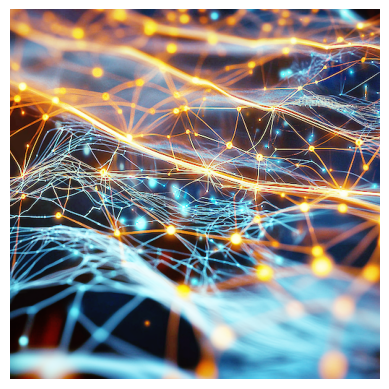

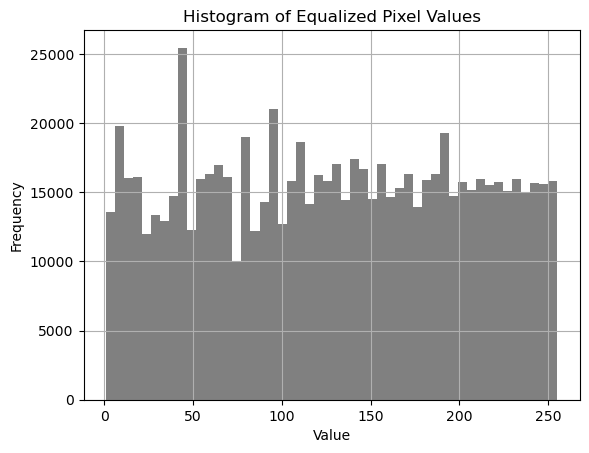

In [34]:
# Define a function to equalize one channel manually

def equalize_channel(channel):

    ...
    return ...



# Apply function per channel using r,g,b variables

eq_r = equalize_channel(r)
eq_g = equalize_channel(g)
eq_b = equalize_channel(b)


# Combine to one image
img_eq = np.stack([eq_r, eq_g, eq_b], axis=2).astype(np.uint8)


# Display final result
plt.imshow(img_eq)
plt.axis('off')
plt.show()




# Plot histogram of pixel values after equalization

plt.hist(img_eq.flatten(), bins=50, color='gray')
plt.title('Histogram of Equalized Pixel Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


